In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("Country-data.csv")

In [4]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<AxesSubplot:>

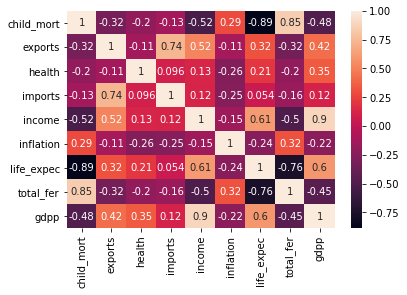

In [7]:
sns.heatmap(data.corr(),annot=True)

In [8]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

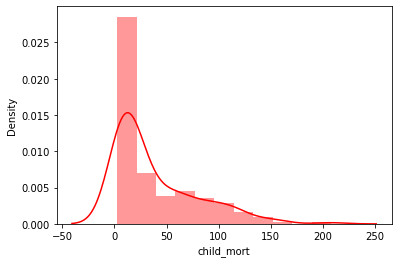

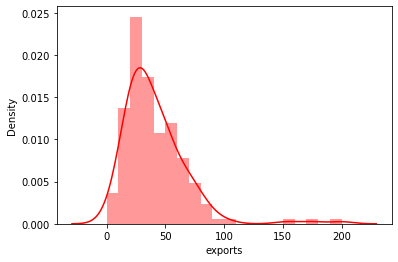

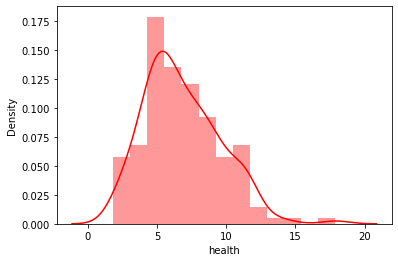

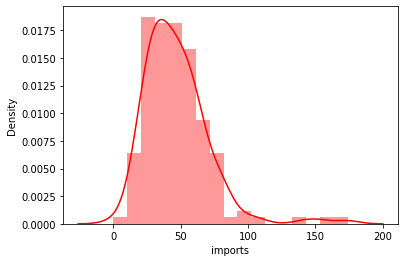

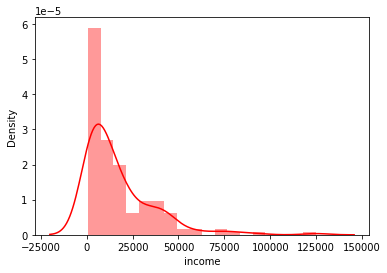

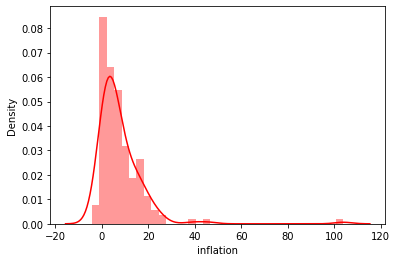

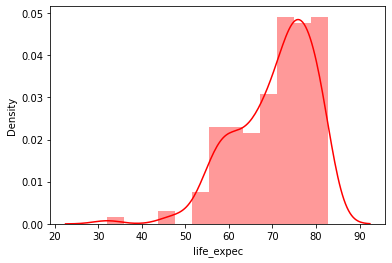

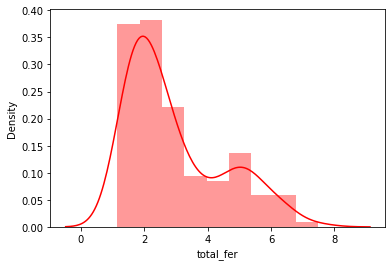

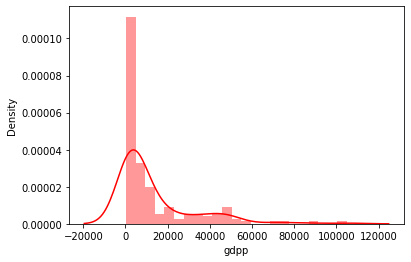

In [19]:
#univariate analysis
for i in (data.columns[1:]):
    sns.distplot(data[i],color="red")
    plt.grid=True
    plt.show()

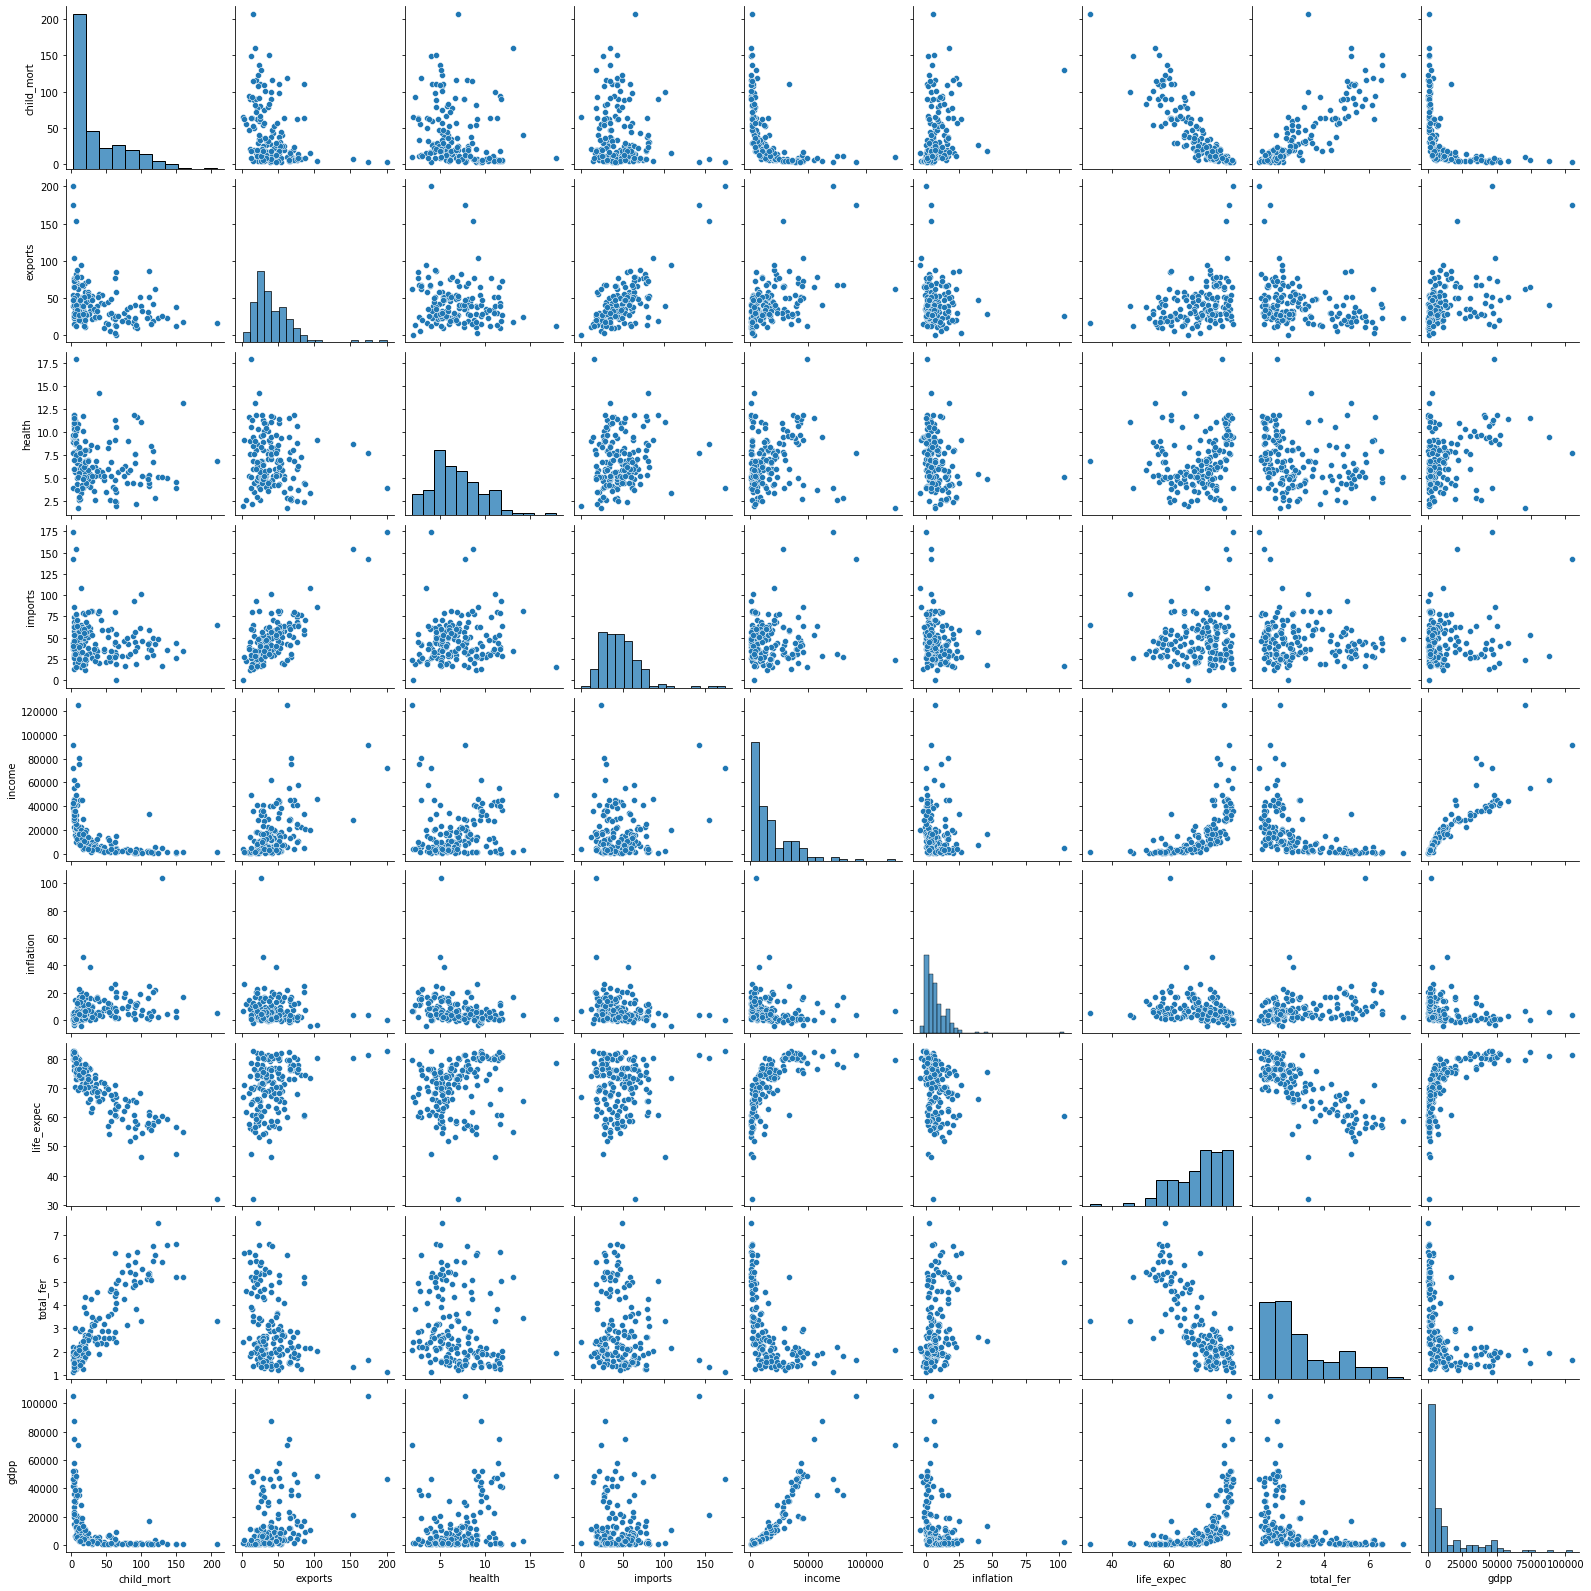

In [21]:
#bivariate analysis
sns.pairplot(data)

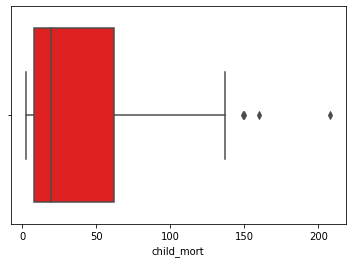

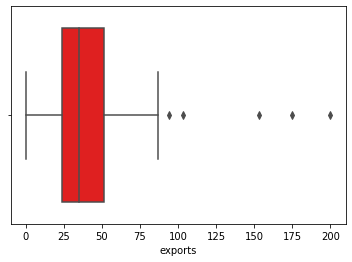

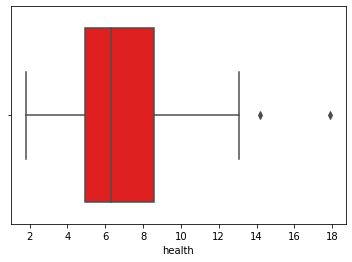

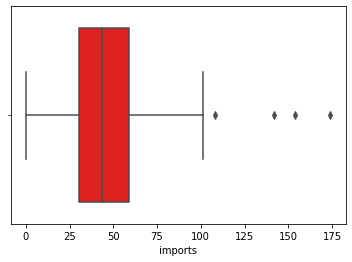

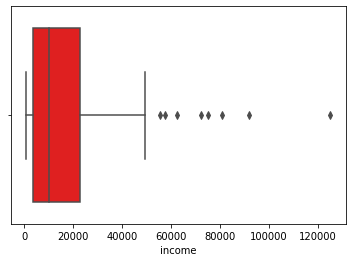

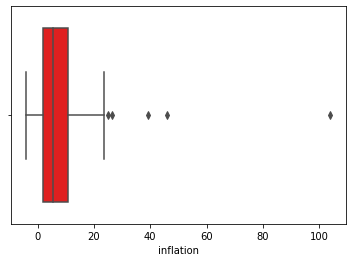

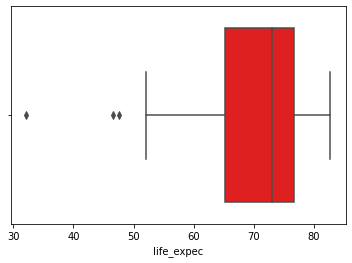

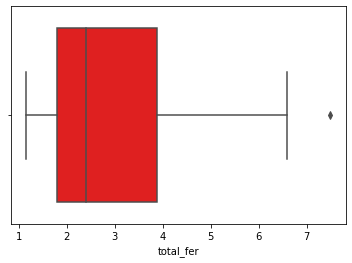

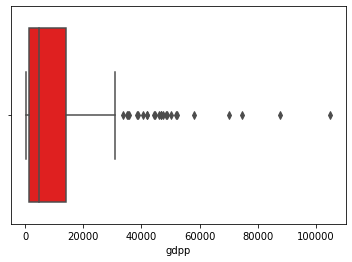

In [22]:
#we can see outliers by plotting boxplot
for i in data.columns[1:]:
    sns.boxplot(data[i],color="red")
    plt.grid=True
    plt.show()

In [23]:
x=data[["child_mort","income","life_expec","gdpp"]]

In [24]:
#we are taking these data

In [28]:
#data preprocessing
from sklearn.preprocessing import StandardScaler

In [29]:
scale=StandardScaler()

In [30]:
scale.fit_transform(x)

array([[ 1.29153238e+00, -8.08245403e-01, -1.61909203e+00,
        -6.79179609e-01],
       [-5.38948897e-01, -3.75368896e-01,  6.47866431e-01,
        -4.85623236e-01],
       [-2.72832734e-01, -2.20844469e-01,  6.70423231e-01,
        -4.65375609e-01],
       [ 2.00780766e+00, -5.85043454e-01, -1.17923442e+00,
        -5.16268293e-01],
       [-6.95634115e-01,  1.01731774e-01,  7.04258432e-01,
        -4.18171341e-02],
       [-5.91177303e-01,  8.09204035e-02,  5.91474429e-01,
        -1.45791437e-01],
       [-5.01642893e-01, -5.43420713e-01,  3.09514422e-01,
        -5.33232522e-01],
       [-8.32422797e-01,  1.26196568e+00,  1.29073525e+00,
         2.13069856e+00],
       [-8.44858132e-01,  1.35561685e+00,  1.12155924e+00,
         1.85708197e+00],
       [ 2.31282334e-02, -5.95563477e-02, -1.64178390e-01,
        -3.89857431e-01],
       [-6.08586772e-01,  2.99439794e-01,  3.65906423e-01,
         8.22811276e-01],
       [-7.37914253e-01,  1.24635715e+00,  6.14031230e-01,
      

In [33]:
#Hierarchial clustering
import scipy.cluster.hierarchy as sch

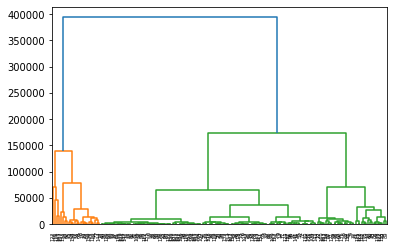

In [34]:
dendogram=sch.dendrogram(sch.linkage(x, 'ward'))
#by this we can say clusters would be 3

In [37]:
from sklearn.cluster import AgglomerativeClustering

In [40]:
cls=AgglomerativeClustering(n_clusters =3,affinity ="euclidean",linkage="ward")
pred_cls=cls.fit_predict(x)

In [43]:
data["cluster_hieararchial"]=cls.labels_
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_hieararchial
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [46]:
#kmeans clustering
from sklearn.cluster import KMeans

In [47]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=5)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

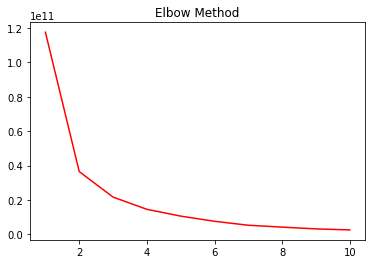

In [51]:
plt.plot(range(1,11),wcss,color="red")
plt.grid=True
plt.title("Elbow Method")

plt.show()

In [55]:
#we can say we can divide clusters=3
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=5)
pred1=kmeans.fit_predict(x)

In [57]:
data["Kmeans_clustering"]=kmeans.labels_

In [59]:
data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_hieararchial,Kmeans_clustering
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,2,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,2,0


In [ ]:
#Visualization for Hierarchial clustering

<AxesSubplot:xlabel='life_expec', ylabel='child_mort'>

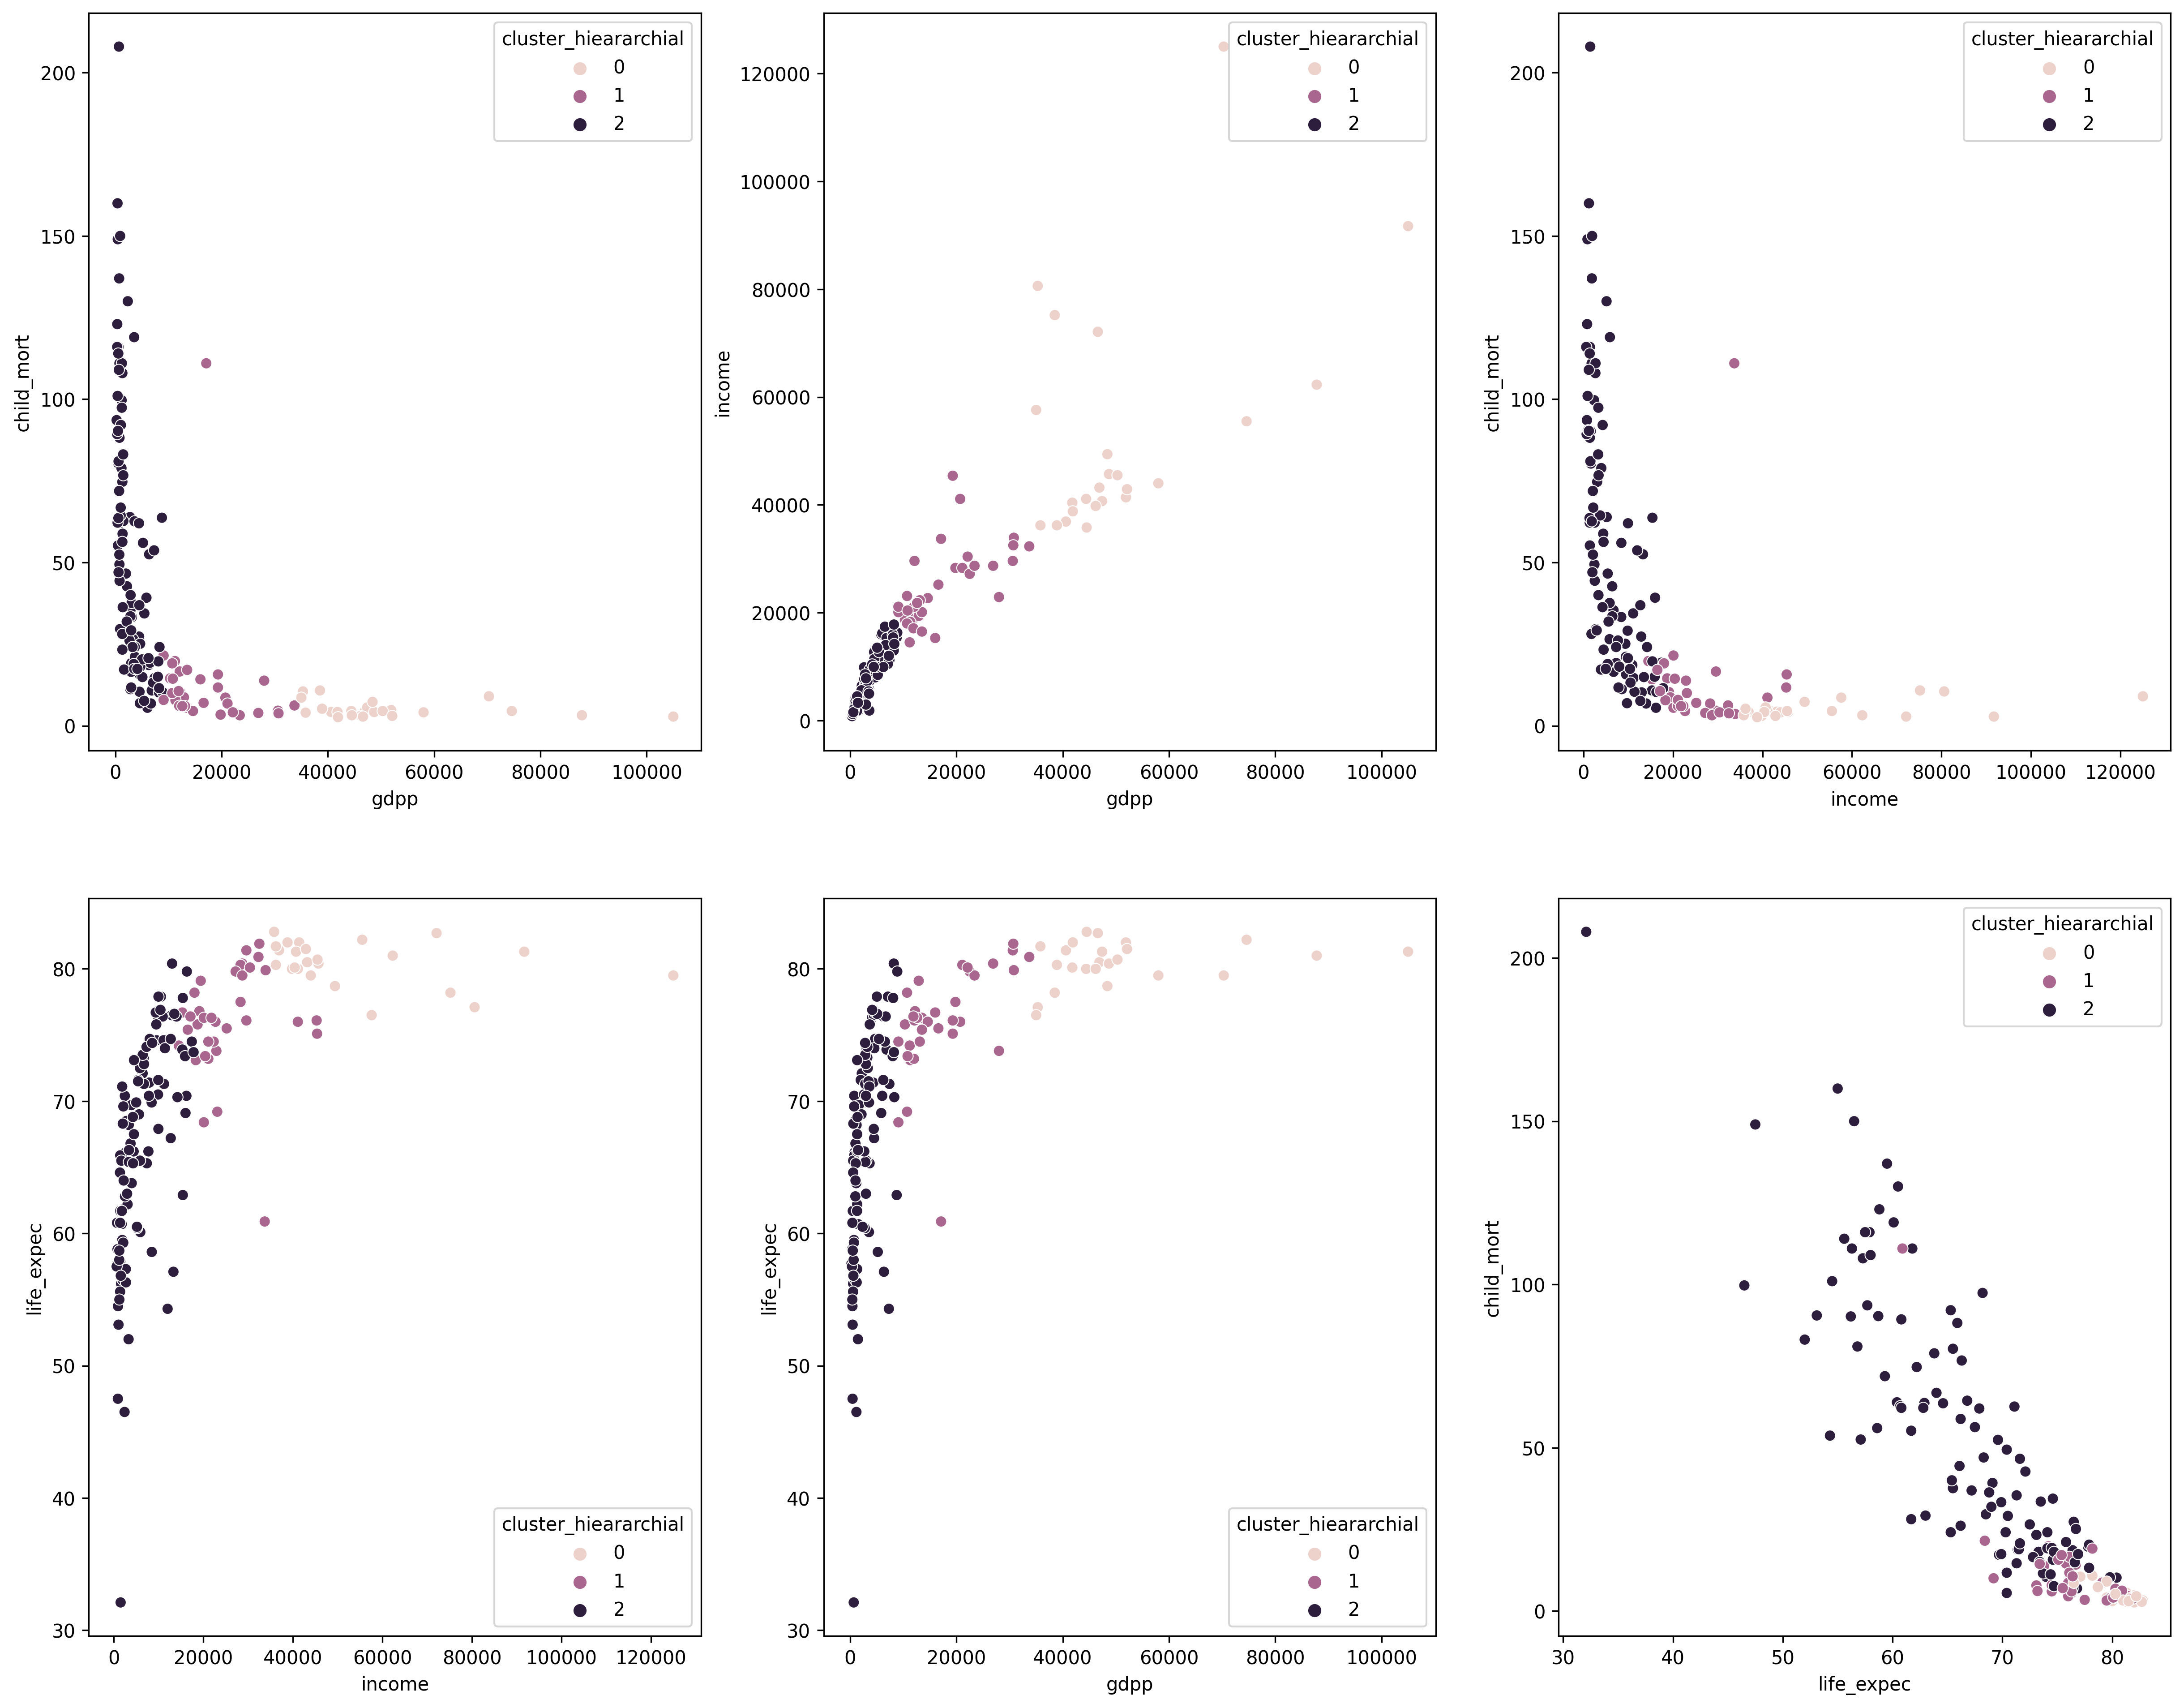

In [89]:
fig, axs = plt.subplots(2,3, figsize = (20,16),dpi= 300)
plt.subplot(2,3,1)
sns.scatterplot(data["gdpp"],data["child_mort"],data=data,hue="cluster_hieararchial")
plt.subplot(2,3,2)
sns.scatterplot(data["gdpp"],data["income"],data=data,hue="cluster_hieararchial")
plt.subplot(2,3,3)
sns.scatterplot(data["income"],data["child_mort"],data=data,hue="cluster_hieararchial")

plt.subplot(2,3,4)
sns.scatterplot(data["income"],data["life_expec"],data=data,hue="cluster_hieararchial")
plt.subplot(2,3,5)
sns.scatterplot(data["gdpp"],data["life_expec"],data=data,hue="cluster_hieararchial")
plt.subplot(2,3,6)
sns.scatterplot(data["life_expec"],data["child_mort"],data=data,hue="cluster_hieararchial")

<AxesSubplot:xlabel='life_expec', ylabel='child_mort'>

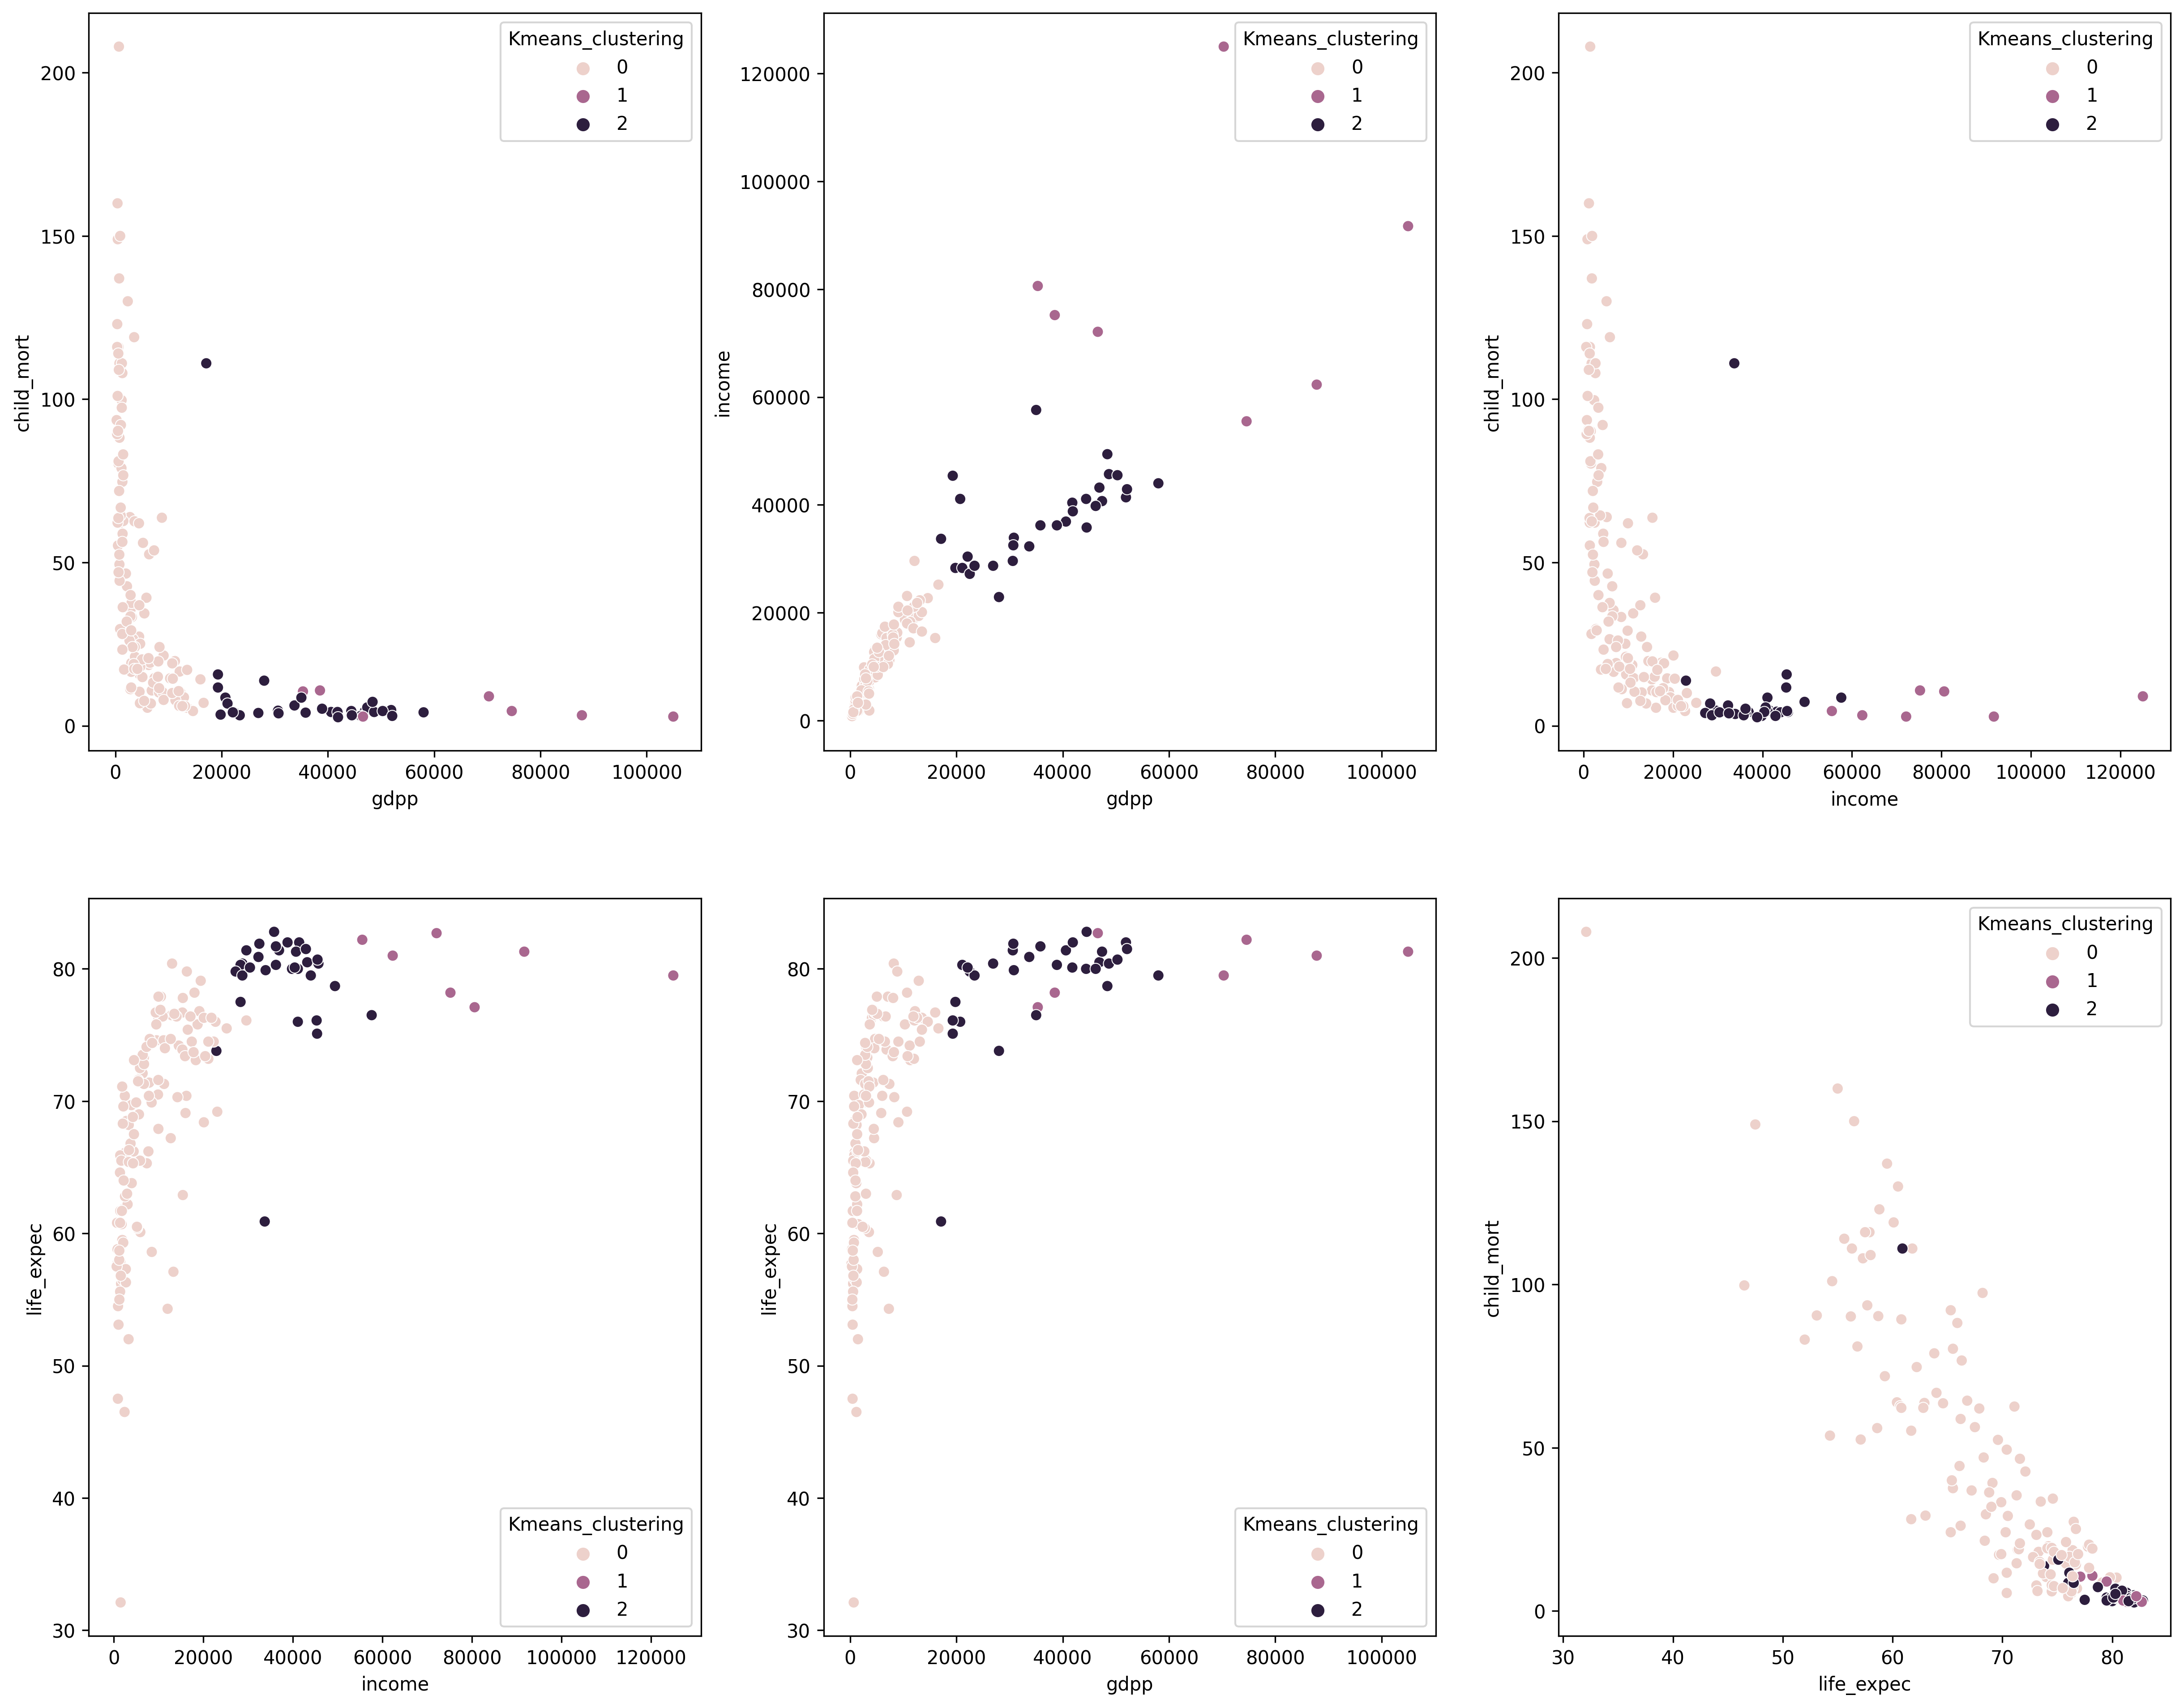

In [90]:
#Visualization for Kmeans clustering
fig, axs = plt.subplots(2,3, figsize = (20,16),dpi= 300)
plt.subplot(2,3,1)
sns.scatterplot(data["gdpp"],data["child_mort"],data=data,hue="Kmeans_clustering")
plt.subplot(2,3,2)
sns.scatterplot(data["gdpp"],data["income"],data=data,hue="Kmeans_clustering")
plt.subplot(2,3,3)
sns.scatterplot(data["income"],data["child_mort"],data=data,hue="Kmeans_clustering")

plt.subplot(2,3,4)
sns.scatterplot(data["income"],data["life_expec"],data=data,hue="Kmeans_clustering")
plt.subplot(2,3,5)
sns.scatterplot(data["gdpp"],data["life_expec"],data=data,hue="Kmeans_clustering")
plt.subplot(2,3,6)
sns.scatterplot(data["life_expec"],data["child_mort"],data=data,hue="Kmeans_clustering")

In [93]:
#results for hierarchial
data[data['cluster_hieararchial'] == 2].sort_values(['gdpp','income','child_mort',"life_expec"],ascending=[True,True,True,False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_hieararchial,Kmeans_clustering
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,2,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,2,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,2,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,2,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,2,0
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,2,0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,2,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,2,0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,2,0
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,2,0


In [ ]:
# results for kmeans

In [94]:
data[data['Kmeans_clustering'] == 2].sort_values(['gdpp','income','child_mort',"life_expec"],ascending=[True,True,True,False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_hieararchial,Kmeans_clustering
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100,1,2
115,Oman,11.7,65.7,2.77,41.2,45300,15.600,76.1,2.90,19300,1,2
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400,17.200,75.1,2.96,19300,1,2
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,1,2
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,1,2
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,1,2
138,South Korea,4.1,49.4,6.93,46.2,30400,3.160,80.1,1.23,22100,1,2
122,Portugal,3.9,29.9,11.00,37.4,27200,0.643,79.8,1.39,22500,1,2
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400,1,2
60,Greece,3.9,22.1,10.30,30.7,28700,0.673,80.4,1.48,26900,1,2
